in this notebook we will try to implemnet reccomendation system based on content filtering , as uusual we will start with importing libraries

problem statement:- we are given an dataset which have multiple columns about the information of an anime, suppose a person has seen a anime ,  now we have to recommend a anime on the basis of that information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lets take a look the data which we have

In [2]:
anime_data=pd.read_csv('anime_data.csv')
anime_data

,item_id,Name,Genres,user_id,rating,timestamp
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",308,4,887736532
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",287,5,875334088
2,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",148,4,877019411
3,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",280,4,891700426
4,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",66,3,883601324
...,...,...,...,...,...,...
92406,1677,Young Herlock wo Oe! Cosmo Warrior Zero Gaiden,"Military, Sci-Fi, Adventure, Space, Drama",854,3,882814368
92407,1678,Cyborg 009: The Cyborg Soldier,"Action, Sci-Fi, Adventure, Mecha, Shounen",863,1,889289570
92408,1679,Green Green Specials,"Comedy, Ecchi, Romance, Slice of Life",863,3,889289491
92409,1681,Brave Story,"Action, Adventure, Fantasy, Kids, Magic, Super...",896,3,887160722


lets gets some more info about the dataframe , so we do pre processing and EDA

In [3]:
anime_data.columns

Index(['item_id', 'Name', 'Genres', 'user_id', 'rating', 'timestamp'], dtype='object')

In [4]:
anime_data.head()

,item_id,Name,Genres,user_id,rating,timestamp
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",308,4,887736532
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",287,5,875334088
2,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",148,4,877019411
3,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",280,4,891700426
4,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",66,3,883601324


lets see some highest rated anime , we will just group by the name and take the mean , because there can be animies which are reviewed more than one user

In [5]:
anime_data.groupby('Name')['rating'].mean().sort_values(ascending=False).head()

Name
Urusei Yatsura                                  5.0
Pokemon Movie 07: Rekkuu no Houmonsha Deoxys    5.0
Eat-Man '98                                     5.0
Eden's Bowy                                     5.0
Teizokurei Daydream                             5.0
Name: rating, dtype: float64

In [6]:
anime_data.groupby('Name')['rating'].count().sort_values(ascending=False).head()

Name
Aa! Megami-sama! (TV)                   584
Hitsuji no Uta                          509
Shin Shirayuki-hime Densetsu Prétear    508
Vandread: The Second Stage              507
Divergence Eve                          485
Name: rating, dtype: int64

to get the cumulative or we can say average rating we take mean and save it as ratings

In [7]:
ratings = pd.DataFrame(anime_data.groupby('Name')['rating'].mean())
ratings.head()

,rating
Name,
.hack//Gift,2.875000
.hack//Intermezzo,4.000000
.hack//Liminality,2.931507
.hack//Roots,2.962963
.hack//Sign,4.094017


In [8]:
ratings['num of ratings'] = pd.DataFrame(anime_data.groupby('Name')['rating'].count())
ratings.head()

,rating,num of ratings
Name,,
.hack//Gift,2.875000,16
.hack//Intermezzo,4.000000,15
.hack//Liminality,2.931507,73
.hack//Roots,2.962963,81
.hack//Sign,4.094017,117


let us check how many times a anime is rated in the dataset , we can infer that mostly animes are rated less than a 100 times

<Axes: >

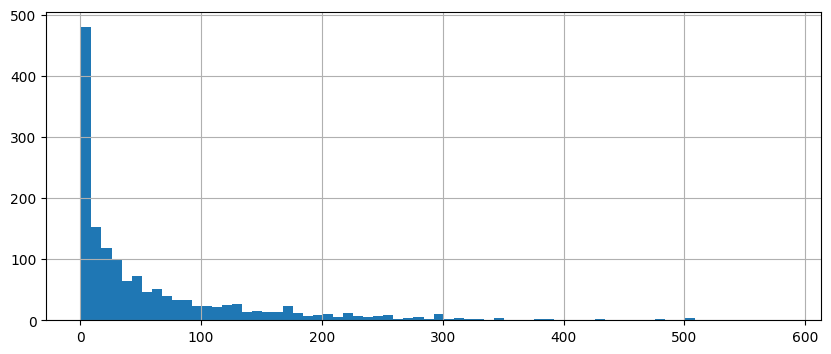

In [9]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

lets check the most given rating , we can observe here the rating somewhat follows a normal distribution.

<Axes: >

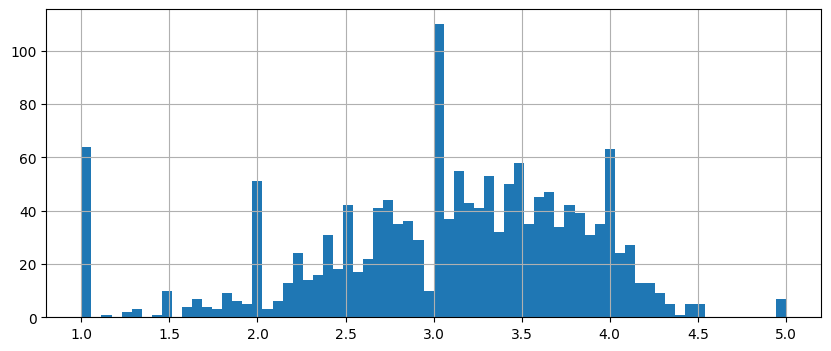

In [10]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

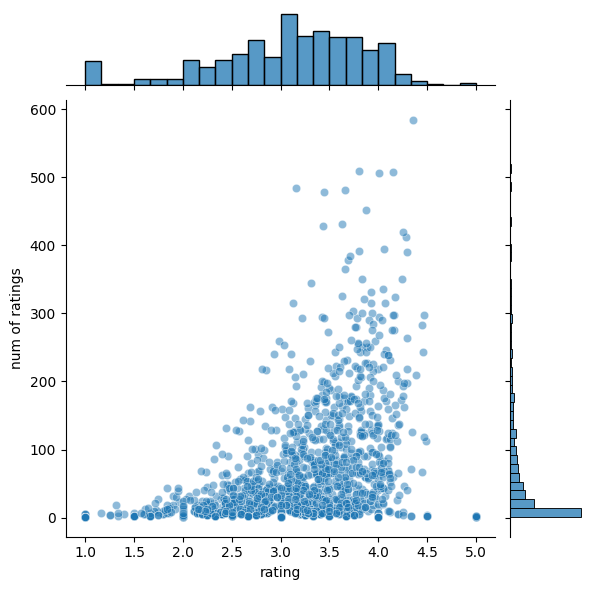

In [11]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

now lets filter the dataset so that we can perform the task of recommendation , we genrally do this step so as we only have to work with the useful data to avoid any faults.

In [12]:
anime_filtered = anime_data.pivot_table(index='user_id',columns='Name',values='rating')
anime_filtered.head()

Name,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,.hack//Unison,009-1,1000-nen Joou: Queen Millennia,3x3 Eyes,...,Zoids,Zoids Genesis,Zoids Shinseiki/Zero,Zone of the Enders: 2167 Idolo,"Zone of the Enders: Dolores, I",eX-Driver,eX-Driver the Movie,s.CRY.ed,xxxHOLiC,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
Name,,
Aa! Megami-sama! (TV),4.359589,584
Hitsuji no Uta,3.803536,509
Shin Shirayuki-hime Densetsu Prétear,4.155512,508
Vandread: The Second Stage,4.007890,507
Divergence Eve,3.156701,485
B'T X,3.656965,481
Bakuten Shoot Beyblade,3.441423,478
Cowboy Bebop,3.878319,452
3x3 Eyes,3.631090,431


In [14]:
ratings.head()

,rating,num of ratings
Name,,
.hack//Gift,2.875000,16
.hack//Intermezzo,4.000000,15
.hack//Liminality,2.931507,73
.hack//Roots,2.962963,81
.hack//Sign,4.094017,117


In [15]:
naruto_user_ratings = anime_filtered['Naruto']
Bouken_user_ratings = anime_filtered['Bouken Ou Beet']
naruto_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Naruto, dtype: float64

In [16]:
similar_to_naruto = anime_filtered.corrwith(naruto_user_ratings)
similar_to_Bouken = anime_filtered.corrwith(Bouken_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


the main objective of Content based reccomendation system is to give recommendation on the similarity of the content , here we take he similarity as ratings, therefore we find the correlation between them

In [17]:
corr_naruto = pd.DataFrame(similar_to_naruto,columns=['Correlation'])
corr_naruto.dropna(inplace=True)
corr_naruto.head()

,Correlation
Name,
.hack//Gift,0.301511
.hack//Intermezzo,0.623610
.hack//Liminality,0.564288
.hack//Roots,0.866921
.hack//Sign,-0.002336


now you can see that we get corr as 1 for a lot values which is actually mis-guiding as these corr occur due to data inconsistency, some of the animes have very few or maybe just one review affecting the approach of taking mean , therefore we have to discard them , this is why it is important to understand the dataset , we could infer this info from the above histogram

In [18]:
corr_naruto.sort_values('Correlation',ascending=False).head(10)

,Correlation
Name,
Kakurenbo,1.0
Masuda Kousuke Gekijou Gag Manga Biyori,1.0
Shin Angyo Onshi,1.0
Heppoko Jikken Animation Excel♥Saga,1.0
Koutetsu Tenshi Kurumi Zero,1.0
Bokura ga Ita,1.0
Cosplay Complex: Extra Identification,1.0
Tokyo Juushouden,1.0
Bubblegum Crisis,1.0


In [19]:
corr_naruto = corr_naruto.join(ratings['num of ratings'])
corr_naruto.head()

,Correlation,num of ratings
Name,,
.hack//Gift,0.301511,16
.hack//Intermezzo,0.623610,15
.hack//Liminality,0.564288,73
.hack//Roots,0.866921,81
.hack//Sign,-0.002336,117


here we try to rectify that error by inly considering the animes which are reviwed more than 100 times we can change valueand analyze the results to get a value which will be appropiate

In [20]:
corr_naruto[corr_naruto['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Name,,
After War Gundam X,0.777159,104
Doraemon,0.670820,123
Tide-Line Blue,0.664357,126
Xiao Qian,0.639010,160
Kidou Keisatsu Patlabor: On Television,0.628155,125


after that , we get this results and now we can do this for the required anime and we should recommend the result of the below code for that specific anime , like id user has seen BOUKEN anime we should recommend SIMOUN and the other following anime

In [21]:
corr_Bouken = pd.DataFrame(similar_to_Bouken,columns=['Correlation'])
corr_Bouken.dropna(inplace=True)
corr_Bouken = corr_Bouken.join(ratings['num of ratings'])
corr_Bouken[corr_Bouken['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Name,,
Bouken Ou Beet,1.000000,219
Simoun,0.543554,136
Asagiri no Miko,0.469349,142
Madlax,0.465383,158
Ranma ½: Chuugoku Nekonron Daikessen! Okite Yaburi no Gekitou-hen!!,0.433289,129
